# **Problem**

## Find out the pontential customer who may book the hotel through by statistical data of hotel website from Google Analytics

# **Data Discription**

## As Known :
### 1. 10 numerical data and 8 categorical data
### 2. target : Revenue (1=Booked, 0=Not Booked)

## Attribution :
### Administrative：管理頁面瀏覽數量                            
### Administrative_Duration：管理頁面瀏覽時間                  
### Informational：資訊頁面瀏覽數量                             
### Informational_Duration：資訊頁面瀏覽時間                    
### ProductRelated：產品頁面瀏覽數量                            
### ProductRelated_Duration：產品頁面瀏覽時間                  
### BounceRates：跳出率                                       
### ExitRates：退出率                                         
### PageValues：頁面價值                                      
### SpecialDay：特殊日期（例如聖誕節，情人節）接近程度              
### Month：訪問月份                                           
### OperatingSystems：作業系統                                
### Browser：瀏覽器                                           
### Region：地區
### TrafficType：流量來源
### VisitorType：訪客類型
### Weekend：訪問時間是否為週末
### Revenue：是否訂房

# **Import Library**

In [31]:
import warnings
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")

# **Load Data**

In [2]:
# load data
train_data=pd.read_csv('C:/Users/User/Desktop/data-question 2/train.csv')
test_data = pd.read_csv('C:/Users/User/Desktop/data-question 2/test.csv')
submission = pd.read_csv('C:/Users/User/Desktop/data-question 2/sample_submission.csv')

In [3]:
train_data

,ID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,8773,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,2,3.0,11.0,3.0,7.0,2.0,0,0
1,6709,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,9,1.0,10.0,0.0,8.0,2.0,0,0
2,1463,9,301.000000,0,0.0,38,2621.621429,0.021212,0.044508,10.721172,0.0,8,1.0,10.0,0.0,14.0,2.0,0,0
3,4095,2,13.333333,0,0.0,105,2062.443592,0.012205,0.020276,0.000000,0.6,2,5.0,10.0,0.0,7.0,2.0,0,0
4,3346,0,0.000000,0,0.0,19,220.384849,0.010526,0.024642,0.000000,0.0,2,1.0,1.0,0.0,7.0,2.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8095,3758,0,0.000000,0,0.0,4,81.000000,0.000000,0.050000,0.000000,0.4,2,1.0,1.0,5.0,7.0,2.0,0,0
8096,4437,1,15.200000,2,62.6,84,4941.698611,0.017647,0.038706,0.000000,0.0,6,3.0,11.0,1.0,8.0,2.0,0,0
8097,7449,0,0.000000,0,0.0,25,701.883333,0.000000,0.023333,0.000000,0.0,6,1.0,10.0,0.0,4.0,2.0,0,0
8098,665,9,183.785714,1,90.0,95,3346.501984,0.002118,0.018656,5.932009,0.0,8,5.0,10.0,5.0,4.0,2.0,0,1


In [4]:
train_data.shape,test_data.shape

((8100, 19), (900, 18))

In [5]:
# data information
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8100 non-null   int64  
 1   Administrative           8100 non-null   int64  
 2   Administrative_Duration  8100 non-null   float64
 3   Informational            8100 non-null   int64  
 4   Informational_Duration   8100 non-null   float64
 5   ProductRelated           8100 non-null   int64  
 6   ProductRelated_Duration  8099 non-null   float64
 7   BounceRates              8100 non-null   float64
 8   ExitRates                8100 non-null   float64
 9   PageValues               8100 non-null   float64
 10  SpecialDay               8100 non-null   float64
 11  Month                    8100 non-null   int64  
 12  OperatingSystems         8099 non-null   float64
 13  Browser                  8099 non-null   float64
 14  Region                  

(None, None)

In [6]:
# missing value
train_data.isnull().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    1
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           1
Browser                    1
Region                     1
TrafficType                1
VisitorType                1
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
test_data.isnull().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

## **Overview**
### * Some variables has wrong datatype
### * The variables which has missing value : ProductRelated_Duration, OperatingSystems, Browser, Region, TrafficType, VisitorType
### * Train data has abnormal data : Month, Weekend

# ****Data Cleaning****

## 1. Handling missing value     
### Since there are 5 columns which has missing value is categorical data, so I use the mode of that column to replace; and "ProductRelated_Duration" is ## continuous data, so use the mean of column to replace.   
                    
## 2. Handling abnormal value           
### When get the data, we need to check whether there are abnormal value in the dataset, so I check the excel file and find out the train dataset has 2 abnormal value, which are Month and Weekend, so use the mode of column to replace                
               
## 3. Change the datatype           
### As metioned above, the dataset has wrong datatype, need to change the datatype originally float to string

In [8]:
# null value
missing_value = ['OperatingSystems','Browser','Region','TrafficType','VisitorType']
train_data[missing_value]=train_data[missing_value].fillna(train_data[missing_value].mode().iloc[0])
train_data['ProductRelated_Duration'].fillna(train_data['ProductRelated_Duration'].mean(),inplace=True)
train_data.isnull().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [9]:
test_data.isnull().sum()

ID                         0
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [10]:
# abnormal data change
train_data['Month'].replace([0,13],train_data['Month'].mode()[0],inplace=True)
train_data['Weekend'].replace(100, train_data['Weekend'].mode()[0],inplace=True)

In [11]:
# change datatype
category_variable = ['SpecialDay','OperatingSystems','Browser','Region', 'TrafficType', 'VisitorType', 'Weekend']
for col in category_variable:
    train_data[col]=train_data[col].astype(str)
    test_data[col]=test_data[col].astype(str)
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8100 entries, 0 to 8099
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       8100 non-null   int64  
 1   Administrative           8100 non-null   int64  
 2   Administrative_Duration  8100 non-null   float64
 3   Informational            8100 non-null   int64  
 4   Informational_Duration   8100 non-null   float64
 5   ProductRelated           8100 non-null   int64  
 6   ProductRelated_Duration  8100 non-null   float64
 7   BounceRates              8100 non-null   float64
 8   ExitRates                8100 non-null   float64
 9   PageValues               8100 non-null   float64
 10  SpecialDay               8100 non-null   object 
 11  Month                    8100 non-null   int64  
 12  OperatingSystems         8100 non-null   object 
 13  Browser                  8100 non-null   object 
 14  Region                  

(None, None)

## **Overview**
### * The datatype is correct now
### * No missing or abnormal value in the data

# **EDA**

## 1. Booked status

### We can known that the number of customers who do not book the hotel is 5 times than book the hotel

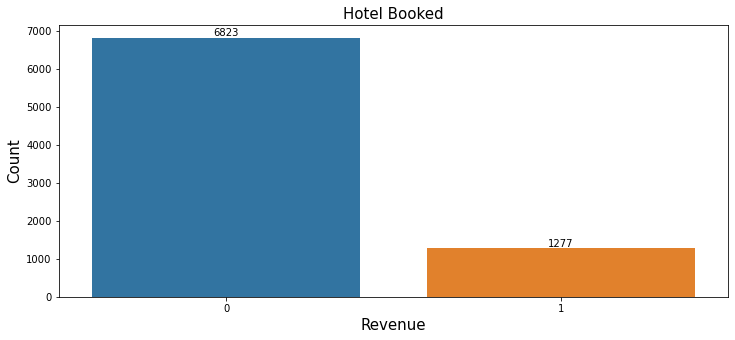

In [12]:
# booking rate
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(train_data['Revenue'])
plt.xlabel('Revenue', size=15)
plt.ylabel('Count', size=15)
plt.title('Hotel Booked', size=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+50,
            '{:.0f}'.format(height), ha="center")


## 2. Views vs Month
### we can know that the most views are in February and August, probably because of Chinese New Year and Summer vacation

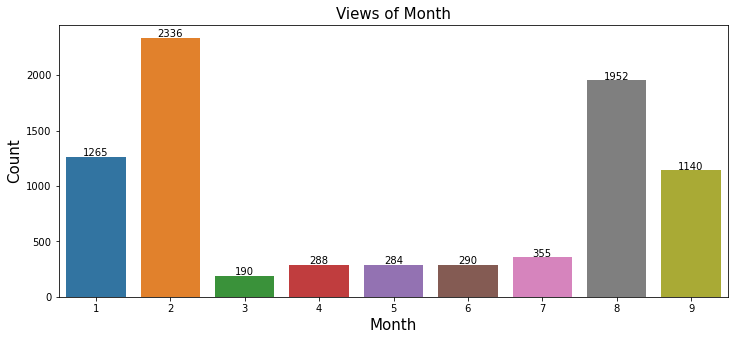

In [13]:
#Month 
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Month',data=train_data)
plt.xlabel('Month', size=15)
plt.ylabel('Count', size=15)
plt.title('Views of Month', size=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10,
            '{:.0f}'.format(height), ha="center")


## 3. Views vs Region
### We can know that the views from Regioin 0 is much more than other region

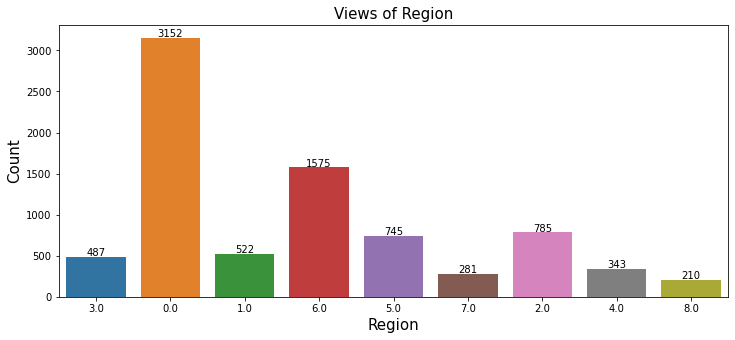

In [14]:
#Region
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Region', data=train_data)
plt.xlabel('Region', size=15)
plt.ylabel('Count', size=15)
plt.title('Views of Region', size=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10,
            '{:.0f}'.format(height), ha="center")


## 4. Views vs Weekend
### we can know that people are watching the website on weekdays, instead of weekend. They don't want to waste the time scrolling the website on weekend.

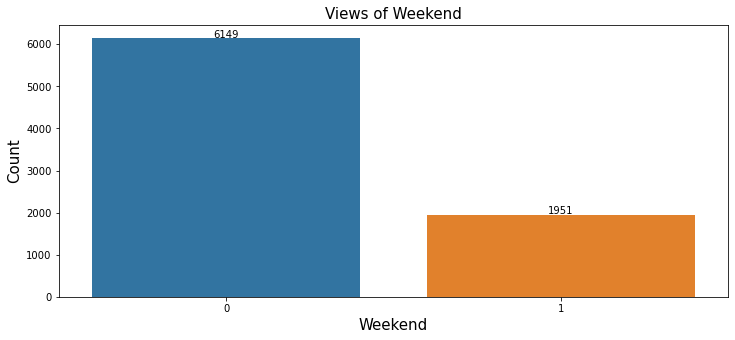

In [15]:
# Weekend
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Weekend', data=train_data)
plt.xlabel('Weekend', size=15)
plt.ylabel('Count', size=15)
plt.title('Views of Weekend', size=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10,
            '{:.0f}'.format(height), ha="center")


## 5. Views vs Operating System
### we can know that the most people who use OperatingSystem 1 to check the website, we can invest more ad source on these operating to attract potential customer

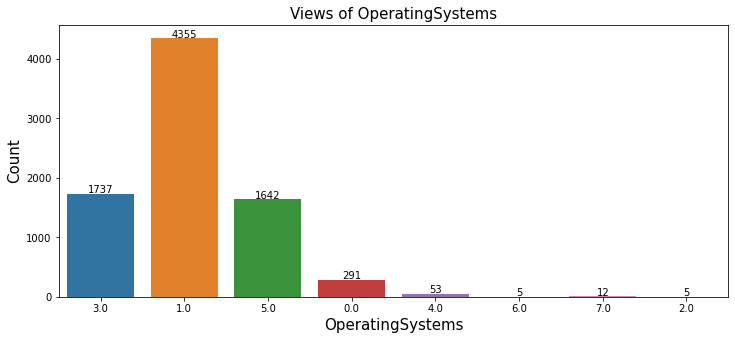

In [16]:
#Operating System
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='OperatingSystems', data=train_data)
plt.xlabel('OperatingSystems', size=15)
plt.ylabel('Count', size=15)
plt.title('Views of OperatingSystems', size=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10,
            '{:.0f}'.format(height), ha="center")


## 6. Views vs Browser
### we can know that the most people use Browser 10 to check the website

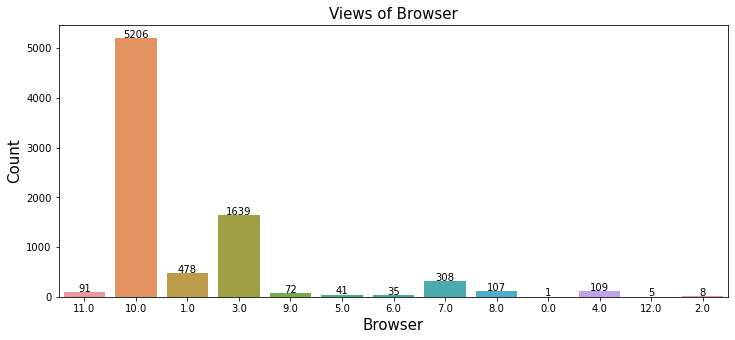

In [17]:
#Browser
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Browser', data=train_data)
plt.xlabel('Browser', size=15)
plt.ylabel('Count', size=15)
plt.title('Views of Browser', size=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10,
            '{:.0f}'.format(height), ha="center")


## 7. Views vs Visitor Type
### we can know that the Visitor Type 2 check the website most frequently

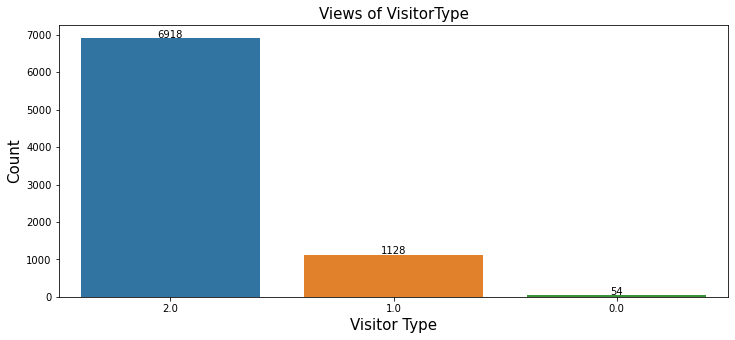

In [18]:
# visitor type
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='VisitorType', data=train_data)
plt.xlabel('Visitor Type', size=15)
plt.ylabel('Count', size=15)
plt.title('Views of VisitorType', size=15)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+10,
            '{:.0f}'.format(height), ha="center")


# **Modeling**

## Feature Engineering

## 1. Since the values are numerical, we don't need to change the categorical data to numerical, so skip the step
## 2. Split the train_data to 80% training data and 20% testing data
## 3. Set the cross validation to validation the model will overfitting or not

In [19]:
# train test split
X=train_data.drop(['Revenue'],axis=1)
y=train_data['Revenue']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=17)

In [20]:
# cross validation
k_folds=10
split=KFold(n_splits=k_folds,shuffle=True,random_state=17)

## Model

## I will use the common classification ML model to training and find the model which has best performance
### 1. Logistic Regression
### 2. Decision Tree
### 3. Random Forest
### 4. K-NN


In [42]:
base_model=[('Logistic Regression',LogisticRegression(solver='liblinear',random_state=17,max_iter=1000,n_jobs=-1)),
            ('Decison Tree',DecisionTreeClassifier(criterion='entropy',random_state=17)),
            ('Random Forest',RandomForestClassifier(random_state=17,n_jobs=-1)),
            ('K-NN',KNeighborsClassifier(n_jobs=-1))
            ]

## The performance of each model
### The selection criteria is accuracy of each model, we can know that Random Forest has the best performance which accuracy is attain to 90%

In [44]:
for name,model in base_model:
    print(f'-------{name}-------')
    for score in ['accuracy','precision','recall','f1']:
        print(f'{score}:',end='')
        print(cross_val_score(model,X,y,cv=split,scoring=score,n_jobs=-1).mean())


-------Logistic Regression-------
accuracy:0.880246913580247
precision:0.7267618937487148
recall:0.38771080947566433
f1:0.5052278124199099
-------Decison Tree-------
accuracy:0.858395061728395
precision:0.5494833936141748
recall:0.5692604043159191
f1:0.5582783593582759
-------Random Forest-------
accuracy:0.9003703703703703
precision:0.7314419215681199
recall:0.5817337128516963
f1:0.6476047182466562
-------K-NN-------
accuracy:0.8246913580246913
precision:0.2863111888111888
recall:0.0757956707955594
f1:0.11967953795171245


## Hyperparameter Tuning
### After the model selected, try to tuning the model to ensure the model can have the perfect performance, so I use the Grid Search to find out which parameter combination can let the model has the best performance

In [56]:
parameter={''
           'min_samples_leaf': [10,30,50],
           'n_estimators': range(100, 200, 20)}
rf_model = RandomForestClassifier(random_state=17,n_jobs=-1)
grid_cv=GridSearchCV(estimator=rf_model,param_grid=parameter,cv=split,scoring='accuracy',n_jobs=-1)
grid_cv.fit(X_train,y_train)
print(f'-----Best Parameter-----')
print(grid_cv.best_params_)


-----Best Parameter-----
{'min_samples_leaf': 10, 'n_estimators': 120}


## When we get the best parameters, we can use these parameters to train the model, and can know that the performance got better

In [57]:
rf_best_model=RandomForestClassifier(random_state=17,min_samples_leaf=10,n_estimators=120,n_jobs=-1)
rf_best_model.fit(X_train,y_train)
for score in ['accuracy', 'precision', 'recall', 'f1']:
    print(f'{score}:', end='')
    print(cross_val_score(rf_best_model, X, y, cv=split, scoring=score,n_jobs=-1).mean())


accuracy:0.9023456790123457
precision:0.7461384686428818
recall:0.5772050755766779
f1:0.6501819295407774


# **Prediction**

In [58]:
frames=[X,test_data]
dataset=pd.concat(frames).sort_values(by='ID').iloc[:3330]
prediction=rf_best_model.predict(dataset)
submission = pd.DataFrame({'ID': dataset['ID'], 'HasRevenue': prediction})
submission.to_csv('submission.csv', index=False)


# **Bonus**

## 混淆矩陣概念：Precision and Recall
### Precision : 預測為真中，預測為真且實際為真。通常運用在高成本的實體商業活動中，這類型的活動要求特定的高消費族群，因此會要求提升Precision而犧牲Recall。也就是說即使TN較少，FN較多，但只要有一筆大額消費就可以賺回成本。
### * Precision=TP/(TP+FP)
### Recall : 實際為真中，預測為真且實際為真。運用在低成本的數位商業活動中，這類型不追求特定族群，而是盡可能吸引消費者，因此會犧牲Precision而提高Recall。只要多一個人消費，就能多一份報酬負擔成本。
### * Recall=TP/(TP+FN)

### 以上題的問題來看，旅館有長期的客人較不容易，因此我認為應該是以Recall為重點，盡可能的提升Recall，多一份消費就多一份報酬。

## 1. Model A
### TP=853
### TN=7230
### FN=576
### FP=341
### Precision = 853/(853+341) = 0.7144
### Recall = 853/(853+576) = 0.5969
### Accuracy = (853+7230)/(853+7230+576+341) = 0.8981
### F1 = (2*853)/(2*853+341+576) = 0.6504


## 2. Model B
### TP=846
### TN=7255
### FN=583
### FP=316
### Precision = 846/(856+316) = 0.7218
### Recall = 846/(846+583) = 0.5920
### Accuracy = (846+7255)/(846+7255+583+316) = 0.8998
### F1 = (2*846)/(2*846+583+316) = 0.6530

### 在兩者數值得差不多時，我會選擇使用Model B，因為在Recall和其他指標的差不多時，盡可能的提升Precision可以得到最大利益